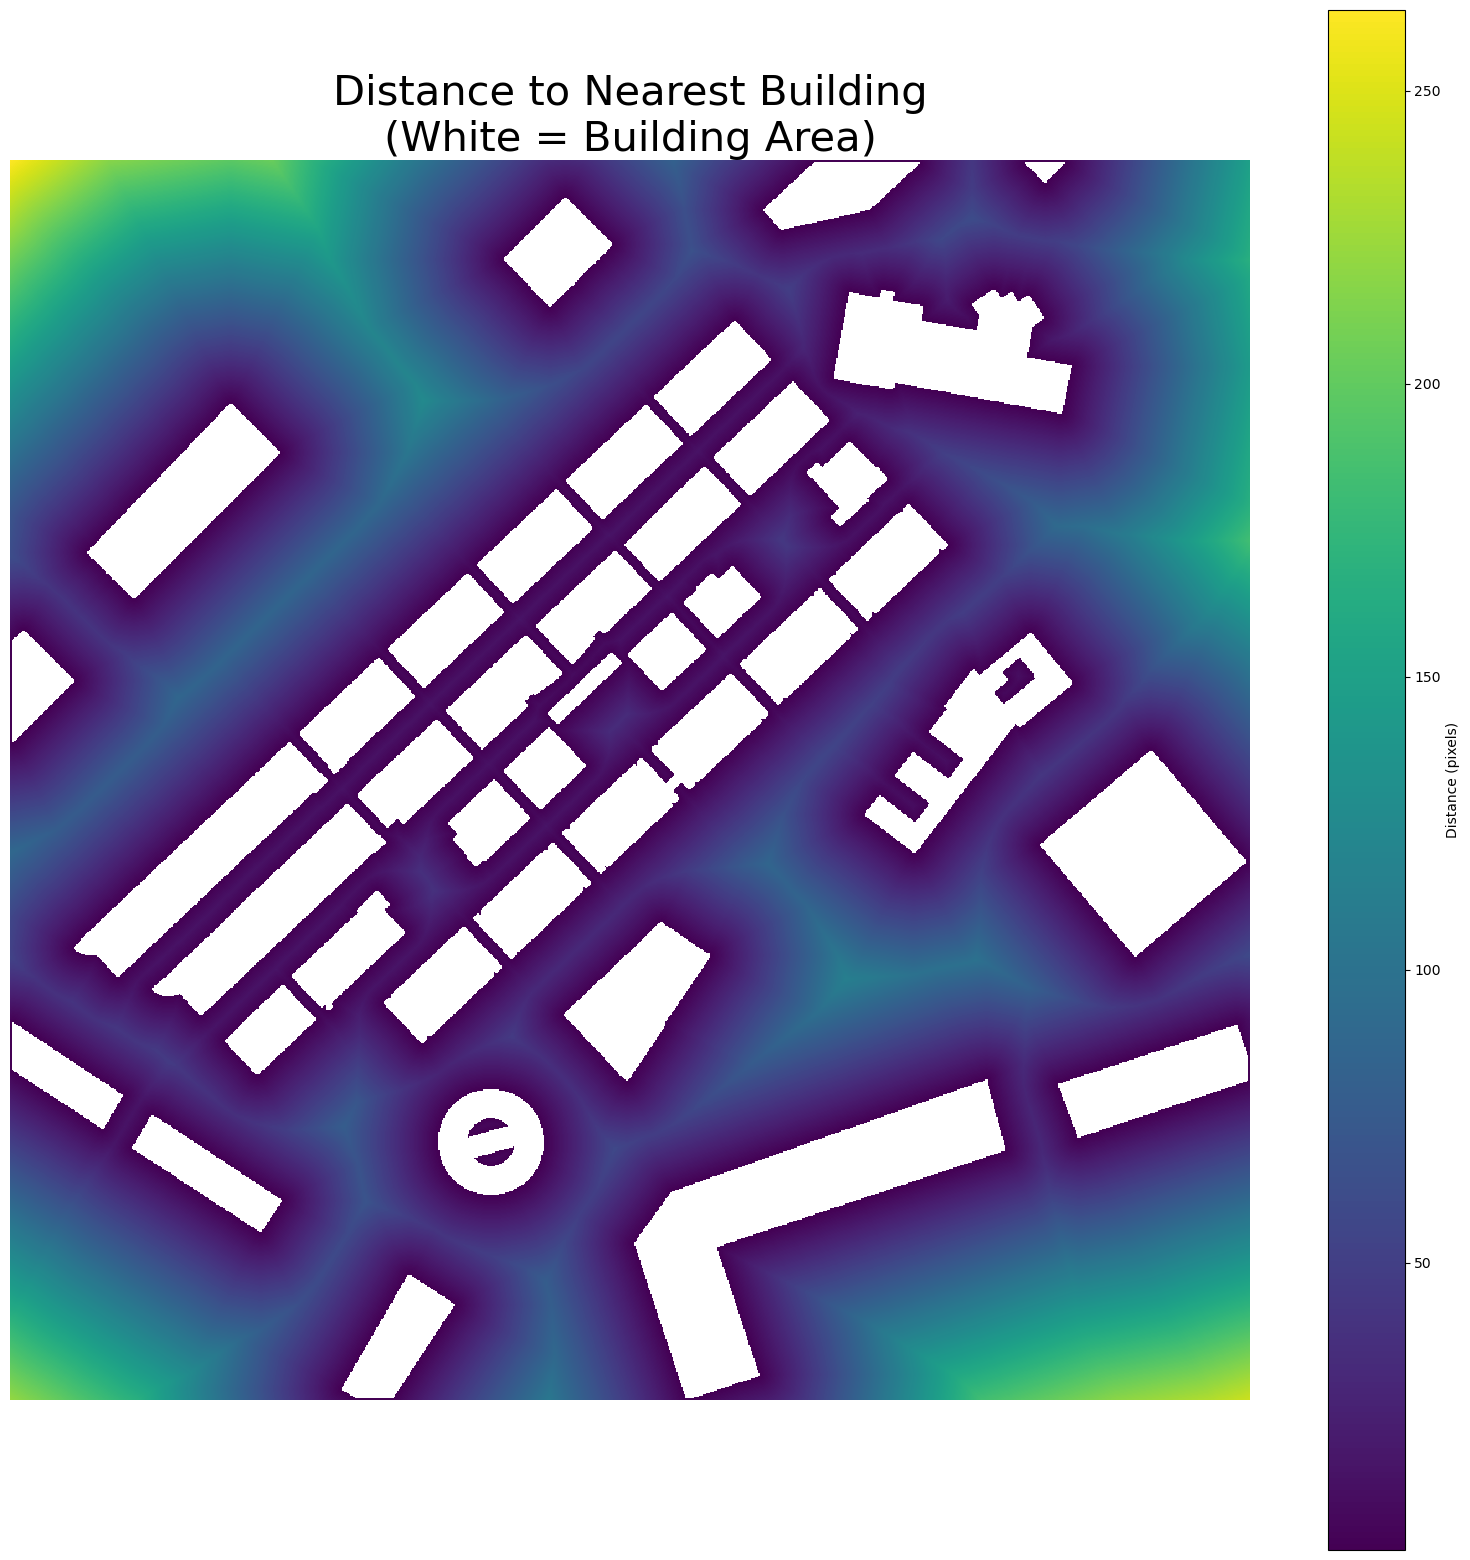

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- 1. Load and preprocess the image ---
# Load image and convert to RGB array
img = np.array(Image.open("..\RawSimOutputData\BldgsMask150cm.png").convert("RGB"))

# Identify building pixels (pure red areas)
red_mask = (img[:, :, 0] > 200) & (img[:, :, 1] < 50) & (img[:, :, 2] < 50)

# Invert for distance transform: 1 where non-building (background), 0 where building
non_building_mask = (~red_mask).astype(np.uint8)

# --- 2. Compute Euclidean distance transform ---
dist_transform = cv2.distanceTransform(non_building_mask, distanceType=cv2.DIST_L2, maskSize=5)

# --- 3. Set distance = NaN in building pixels ---
dist_transform_nan = dist_transform.astype(float)
dist_transform_nan[red_mask] = np.nan

# --- 4. Visualization ---
plt.figure(figsize=(20, 20))
cmap = plt.cm.viridis.copy()
cmap.set_bad(color='white')  # NaNs appear white

plt.imshow(dist_transform_nan, cmap=cmap)
plt.title("Distance to Nearest Building\n(White = Building Area)",fontsize=30)
plt.axis("off")
plt.colorbar(label="Distance (pixels)")
plt.show()
